# Ai for finance - Project 1

## 1)	Collect price information of ‘your stock’ and stock market (S&P 500 index) from Yahoo Finance for the past 5 years, 15 years, and 30 years. Note that you have price information – not returns – calculate returns  before you do anything since the CAPM is all about stock returns. Using Python calculate parts i) through iv) below.  Risk-free returns can be downloaded @ http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html Comment on your results. 
## I.	Average Excess returns (excess returns are defined as “returns of a stock/portfolio minus risk-free returns)
## II.	Sharpe-ratio, which is Mean/Standard deviation of excess returns.
## III.	Alpha, which is the constant term in Ordinary Least Squares Regression (OLS). 
## IV.	Beta, which is the coefficient of the explanatory variable. 
## V.	Comment on whether your estimates are correct (check for ‘beta’ that you can find in Yahoo Finance to compare).


In [1]:
import pandas as pd
import numpy as np

SPX = pd.read_csv('SP500.csv')
sony = pd.read_csv('SONY.csv')
famafrench = pd.read_csv('Data_Factors.csv')

In [2]:
#reverse order
SPX = SPX[::-1].reset_index(drop=True)

In [3]:
#Removing outdated Risk-free
famafrench = famafrench[famafrench['Date'].astype(int) > 199302].reset_index(drop=True)

In [4]:
famafrench

,Date,Mkt-RF,SMB,HML,RF
0,199303,2.30,0.24,1.18,0.25
1,199304,-3.05,-0.67,2.49,0.24
2,199305,2.89,2.04,-3.42,0.22
3,199306,0.31,-0.29,2.75,0.25
4,199307,-0.34,0.96,2.85,0.24
...,...,...,...,...,...
354,202209,-9.35,-0.79,0.06,0.19
355,202210,7.83,0.09,8.05,0.23
356,202211,4.60,-3.40,1.38,0.29
357,202212,-6.41,-0.68,1.32,0.33


In [5]:
sony

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-03-01,16.750000,19.500000,16.562500,19.187500,17.461498,2695200
1,1993-04-01,19.125000,22.500000,19.125000,22.437500,20.537745,2636200
2,1993-05-01,22.375000,22.500000,20.687500,21.062500,19.279163,1421600
3,1993-06-01,21.000000,21.937500,19.562500,20.062500,18.363834,1757000
4,1993-07-01,20.125000,21.500000,19.687500,21.187500,19.393581,718000
...,...,...,...,...,...,...,...
354,2022-09-01,79.050003,79.180000,63.930000,64.050003,64.050003,15634600
355,2022-10-01,65.459999,68.470001,61.720001,67.470001,67.470001,18182000
356,2022-11-01,70.599998,84.169998,70.510002,83.070000,83.070000,23500800
357,2022-12-01,82.900002,84.190002,74.809998,76.279999,76.279999,15446700


In [6]:
SPX

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/1993,451.67,443.38,456.76,441.07,NaN,2.19%
1,04/01/1993,440.19,451.67,452.63,432.30,NaN,-2.54%
2,05/01/1993,450.19,440.19,454.55,436.86,NaN,2.27%
3,06/01/1993,450.53,450.23,455.63,442.50,NaN,0.08%
4,07/01/1993,448.13,450.54,451.15,441.40,NaN,-0.53%
...,...,...,...,...,...,...,...
356,11/01/2022,"4,080.11","3,911.50","4,080.11","3,695.60",NaN,5.38%
357,12/01/2022,"3,839.50","4,089.50","4,103.05","3,764.14",NaN,-5.90%
358,01/01/2023,"4,076.60","3,858.38","4,094.32","3,793.67",NaN,6.18%
359,02/01/2023,"3,970.15","4,063.85","4,195.34","3,942.86",NaN,-2.61%


In [7]:
#adding all the relevant informations in one dataframe
sony['SP500 Price'] = SPX['Price']
sony = sony.join(famafrench.drop(['Date'], axis=1))
sony.dropna(inplace=True)
sony

,Date,Open,High,Low,Close,Adj Close,Volume,SP500 Price,Mkt-RF,SMB,HML,RF
0,1993-03-01,16.750000,19.500000,16.562500,19.187500,17.461498,2695200,451.67,2.30,0.24,1.18,0.25
1,1993-04-01,19.125000,22.500000,19.125000,22.437500,20.537745,2636200,440.19,-3.05,-0.67,2.49,0.24
2,1993-05-01,22.375000,22.500000,20.687500,21.062500,19.279163,1421600,450.19,2.89,2.04,-3.42,0.22
3,1993-06-01,21.000000,21.937500,19.562500,20.062500,18.363834,1757000,450.53,0.31,-0.29,2.75,0.25
4,1993-07-01,20.125000,21.500000,19.687500,21.187500,19.393581,718000,448.13,-0.34,0.96,2.85,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-09-01,79.050003,79.180000,63.930000,64.050003,64.050003,15634600,"3,585.62",-9.35,-0.79,0.06,0.19
355,2022-10-01,65.459999,68.470001,61.720001,67.470001,67.470001,18182000,"3,871.98",7.83,0.09,8.05,0.23
356,2022-11-01,70.599998,84.169998,70.510002,83.070000,83.070000,23500800,"4,080.11",4.60,-3.40,1.38,0.29
357,2022-12-01,82.900002,84.190002,74.809998,76.279999,76.279999,15446700,"3,839.50",-6.41,-0.68,1.32,0.33


In [8]:
#Calculate returns and excess returns 
closing_list = list(sony['Adj Close'])
return_list = [None] 
for i in range(1,len(sony['Adj Close'])):
    return_list.append(100*((closing_list[i] - closing_list[i - 1]) / closing_list[i - 1]))

sony['Return'] = return_list
sony['Excess Return'] = sony['Return'] - sony['RF']
sony

,Date,Open,High,Low,Close,Adj Close,Volume,SP500 Price,Mkt-RF,SMB,HML,RF,Return,Excess Return
0,1993-03-01,16.750000,19.500000,16.562500,19.187500,17.461498,2695200,451.67,2.30,0.24,1.18,0.25,NaN,NaN
1,1993-04-01,19.125000,22.500000,19.125000,22.437500,20.537745,2636200,440.19,-3.05,-0.67,2.49,0.24,17.617314,17.377314
2,1993-05-01,22.375000,22.500000,20.687500,21.062500,19.279163,1421600,450.19,2.89,2.04,-3.42,0.22,-6.128141,-6.348141
3,1993-06-01,21.000000,21.937500,19.562500,20.062500,18.363834,1757000,450.53,0.31,-0.29,2.75,0.25,-4.747763,-4.997763
4,1993-07-01,20.125000,21.500000,19.687500,21.187500,19.393581,718000,448.13,-0.34,0.96,2.85,0.24,5.607473,5.367473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-09-01,79.050003,79.180000,63.930000,64.050003,64.050003,15634600,"3,585.62",-9.35,-0.79,0.06,0.19,-19.281658,-19.471658
355,2022-10-01,65.459999,68.470001,61.720001,67.470001,67.470001,18182000,"3,871.98",7.83,0.09,8.05,0.23,5.339575,5.109575
356,2022-11-01,70.599998,84.169998,70.510002,83.070000,83.070000,23500800,"4,080.11",4.60,-3.40,1.38,0.29,23.121385,22.831385
357,2022-12-01,82.900002,84.190002,74.809998,76.279999,76.279999,15446700,"3,839.50",-6.41,-0.68,1.32,0.33,-8.173831,-8.503831


In [9]:
#creating a date-time mask
sony['Date'] = pd.to_datetime(sony['Date'])

mask_5years = sony['Date'] > pd.to_datetime('2018-01-01')
mask_15years = sony['Date'] > pd.to_datetime('2008-01-01')

In [12]:
#Printing Average Excess Return and Sharpe-ratio
print('#### 5 years ####')
print('Average Excess Return: {:.3f}'.format( np.mean(sony.loc[mask_5years]['Excess Return'])))
print('Sharpe-ratio: {:.3f}'.format(np.mean(sony.loc[mask_5years]['Excess Return']) / 
      np.std(sony.loc[mask_5years]['Excess Return'])))

print('#### 15 years ####')
print('Average Excess Return: {:.3f}'.format( np.mean(sony.loc[mask_15years]['Excess Return'])))
print('Sharpe-ratio: {:.3f}'.format(np.mean(sony.loc[mask_15years]['Excess Return']) / 
      np.std(sony.loc[mask_15years]['Excess Return'])))

print('#### 30 years ####')
print('Average Excess Return: {:.3f}'.format( np.mean(sony['Excess Return'])))
print('Sharpe-ratio: {:.3f}'.format(np.mean(sony['Excess Return']) / np.std(sony['Excess Return'])))

#### 5 years ####
Average Excess Return: 1.305
Sharpe-ratio: 0.154
#### 15 years ####
Average Excess Return: 0.852
Sharpe-ratio: 0.081
#### 30 years ####
Average Excess Return: 0.801
Sharpe-ratio: 0.077


In [13]:
#Calculate Market returns and market excess returns from the S&P500
list_temp = list(sony['SP500 Price'])
new_list = []
for element in list_temp:
    new_list.append(str(element).replace(',',''))
sony['SP500 Price'] = new_list   
sony['SP500 Price'] = sony['SP500 Price'].astype(np.float64)

closing_list = list(sony['SP500 Price'])
return_list = [None]
for i in range(1,len(closing_list)):
    return_list.append(100*((closing_list[i] - closing_list[i - 1]) / closing_list[i - 1]))

sony['Return Market'] = return_list
sony['Excess Return Market'] = sony['Return Market'] - sony['RF']
sony

,Date,Open,High,Low,Close,Adj Close,Volume,SP500 Price,Mkt-RF,SMB,HML,RF,Return,Excess Return,Return Market,Excess Return Market
0,1993-03-01,16.750000,19.500000,16.562500,19.187500,17.461498,2695200,451.67,2.30,0.24,1.18,0.25,NaN,NaN,NaN,NaN
1,1993-04-01,19.125000,22.500000,19.125000,22.437500,20.537745,2636200,440.19,-3.05,-0.67,2.49,0.24,17.617314,17.377314,-2.541679,-2.781679
2,1993-05-01,22.375000,22.500000,20.687500,21.062500,19.279163,1421600,450.19,2.89,2.04,-3.42,0.22,-6.128141,-6.348141,2.271746,2.051746
3,1993-06-01,21.000000,21.937500,19.562500,20.062500,18.363834,1757000,450.53,0.31,-0.29,2.75,0.25,-4.747763,-4.997763,0.075524,-0.174476
4,1993-07-01,20.125000,21.500000,19.687500,21.187500,19.393581,718000,448.13,-0.34,0.96,2.85,0.24,5.607473,5.367473,-0.532706,-0.772706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-09-01,79.050003,79.180000,63.930000,64.050003,64.050003,15634600,3585.62,-9.35,-0.79,0.06,0.19,-19.281658,-19.471658,-9.339570,-9.529570
355,2022-10-01,65.459999,68.470001,61.720001,67.470001,67.470001,18182000,3871.98,7.83,0.09,8.05,0.23,5.339575,5.109575,7.986345,7.756345
356,2022-11-01,70.599998,84.169998,70.510002,83.070000,83.070000,23500800,4080.11,4.60,-3.40,1.38,0.29,23.121385,22.831385,5.375286,5.085286
357,2022-12-01,82.900002,84.190002,74.809998,76.279999,76.279999,15446700,3839.50,-6.41,-0.68,1.32,0.33,-8.173831,-8.503831,-5.897145,-6.227145


In [14]:
#compute the Ordinary Least Squares Regression 
import statsmodels.api as sm

#dropping nan values
sony.dropna(inplace=True)

#OLS with Risk-free over 5 years
X = sony.loc[mask_5years]['Excess Return Market']
y = sony.loc[mask_5years]['Excess Return']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()

print('[5 years]')
print(results.summary())
print('alpha: ', results.params[0])
print('beta: ', results.params[1])

[5 years]
                            OLS Regression Results                            
Dep. Variable:          Excess Return   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     42.98
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.62e-08
Time:                        09:51:09   Log-Likelihood:                -196.80
No. Observations:                  60   AIC:                             397.6
Df Residuals:                      58   BIC:                             401.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [15]:
#OLS with Risk-free over 15 years
X = sony.loc[mask_15years]['Excess Return Market']
y = sony.loc[mask_15years]['Excess Return']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()
results.summary()

print('[15 years]')
print(results.summary())
print('alpha: ', results.params[0])
print('beta: ', results.params[1])

[15 years]
                            OLS Regression Results                            
Dep. Variable:          Excess Return   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     105.7
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           9.28e-20
Time:                        09:52:10   Log-Likelihood:                -636.13
No. Observations:                 180   AIC:                             1276.
Df Residuals:                     178   BIC:                             1283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                

In [16]:
#OLS with Risk-free over 30 years
X = sony['Excess Return Market']
y = sony['Excess Return']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()
results.summary()

print('[30 years]')
print(results.summary())
print('alpha: ', results.params[0])
print('beta: ', results.params[1])

[30 years]
                            OLS Regression Results                            
Dep. Variable:          Excess Return   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           7.96e-25
Time:                        09:52:13   Log-Likelihood:                -1291.2
No. Observations:                 358   AIC:                             2586.
Df Residuals:                     356   BIC:                             2594.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                

Beta value of Sony Group Corporation (SONY) from yahoo finance over 5 years: 0.96

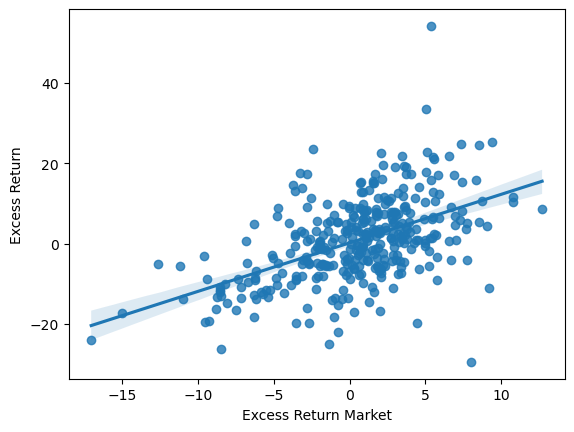

In [17]:
#plotting the results
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Excess Return Market', y='Excess Return', data=sony)
plt.show()

## 2)	Now consider that you are a portfolio manager and you have 1 million dollars to invest, and hence you want to diversify the risk of owning ‘your stock’. Pick any number of stocks (10 minimum) you want to create an equally weighted stock portfolio of stocks and calculate parts i) through iv) above for the portfolio. Comment on your results.

In [18]:
#Collect 10 stocks data
apple = pd.read_csv('AAPL.csv')
adobe = pd.read_csv('ADBE.csv')
disney = pd.read_csv('DIS.csv')
ibm = pd.read_csv('IBM.csv')
intel = pd.read_csv('INTC.csv')
cocacola = pd.read_csv('KO.csv')
microsoft = pd.read_csv('MSFT.csv')
motorola = pd.read_csv('MSI.csv')
nike = pd.read_csv('NKE.csv')
walmart = pd.read_csv('WMT.csv')

In [19]:
apple #all other data will have the same format

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-03-01,0.473214,0.515625,0.448661,0.459821,0.377748,3661526400
1,1993-04-01,0.457589,0.468750,0.417411,0.457589,0.375914,3914411200
2,1993-05-01,0.457589,0.527902,0.455357,0.505580,0.415339,3200545600
3,1993-06-01,0.504464,0.520089,0.343750,0.352679,0.290335,7674396800
4,1993-07-01,0.348214,0.354911,0.227679,0.247768,0.203969,7142912000
...,...,...,...,...,...,...,...
355,2022-10-01,138.210007,157.500000,134.369995,153.339996,152.852676,1868139700
356,2022-11-01,155.080002,155.449997,134.380005,148.029999,147.559540,1724847700
357,2022-12-01,148.210007,150.919998,125.870003,129.929993,129.731918,1675731200
358,2023-01-01,130.279999,147.229996,124.169998,144.289993,144.070023,1443652500


In [20]:
famafrench #Fama-French factors

,Date,Mkt-RF,SMB,HML,RF
0,199303,2.30,0.24,1.18,0.25
1,199304,-3.05,-0.67,2.49,0.24
2,199305,2.89,2.04,-3.42,0.22
3,199306,0.31,-0.29,2.75,0.25
4,199307,-0.34,0.96,2.85,0.24
...,...,...,...,...,...
354,202209,-9.35,-0.79,0.06,0.19
355,202210,7.83,0.09,8.05,0.23
356,202211,4.60,-3.40,1.38,0.29
357,202212,-6.41,-0.68,1.32,0.33


In [21]:
SPX #S&P500 index

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/1993,451.67,443.38,456.76,441.07,NaN,2.19%
1,04/01/1993,440.19,451.67,452.63,432.30,NaN,-2.54%
2,05/01/1993,450.19,440.19,454.55,436.86,NaN,2.27%
3,06/01/1993,450.53,450.23,455.63,442.50,NaN,0.08%
4,07/01/1993,448.13,450.54,451.15,441.40,NaN,-0.53%
...,...,...,...,...,...,...,...
356,11/01/2022,"4,080.11","3,911.50","4,080.11","3,695.60",NaN,5.38%
357,12/01/2022,"3,839.50","4,089.50","4,103.05","3,764.14",NaN,-5.90%
358,01/01/2023,"4,076.60","3,858.38","4,094.32","3,793.67",NaN,6.18%
359,02/01/2023,"3,970.15","4,063.85","4,195.34","3,942.86",NaN,-2.61%


In [22]:
portfolio = [apple, adobe, disney, ibm, intel, cocacola, microsoft, motorola, nike, walmart]
assets = ['Apple', 'Adobe', 'Disney', 'Ibm', 'Intel', 'Cocacola', 'Microsoft', 'Motorola', 'Nike', 'Walmart']

returns = pd.DataFrame()
returns['Date'] = apple['Date']

for stock, asset in zip(portfolio, assets):
    returns_list = [None]
    for i in range(1,len(stock['Adj Close'])):
        returns_list.append( (100 * (stock['Adj Close'][i] - stock['Adj Close'][i - 1]) / stock['Adj Close'][i - 1]))
    returns['Return ' + asset] = returns_list
    
returns

,Date,Return Apple,Return Adobe,Return Disney,Return Ibm,Return Intel,Return Cocacola,Return Microsoft,Return Motorola,Return Nike,Return Walmart
0,1993-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-04-01,-0.485509,33.441922,-8.426984,-4.422601,-17.282622,-7.264282,-7.567581,10.384497,-10.898271,-15.667724
2,1993-05-01,10.487771,15.283807,8.128295,8.483256,16.682989,5.396790,8.333343,10.958905,6.227095,4.205563
3,1993-06-01,-30.096861,-6.439380,-7.386394,-5.363025,-0.789100,3.614425,-4.993264,7.870274,-23.965521,-5.829585
4,1993-07-01,-29.747016,-19.707482,-7.975436,-9.873489,-5.000018,1.004069,-15.909064,3.854907,2.076875,-3.217030
...,...,...,...,...,...,...,...,...,...,...,...
355,2022-10-01,10.955153,15.734007,12.943919,16.395933,10.322072,7.615760,-0.330612,11.851697,11.821706,9.737856
356,2022-11-01,-3.462900,8.298271,-8.137787,7.672267,5.768548,6.282379,9.912552,9.006450,18.353489,7.089162
357,2022-12-01,-12.081647,-2.435275,-11.229187,-4.251295,-10.917972,0.709217,-5.739653,-5.323299,6.673348,-6.974157
358,2023-01-01,11.052103,10.046652,24.873391,-4.372203,6.923950,-3.600064,3.331663,0.057979,9.153777,1.849472


In [23]:
excess_returns = pd.DataFrame()
excess_returns['Date'] = returns['Date']

for asset in assets:
    excess_returns['Excess Return ' + asset] = returns['Return ' + asset] - famafrench['RF']

excess_returns

,Date,Excess Return Apple,Excess Return Adobe,Excess Return Disney,Excess Return Ibm,Excess Return Intel,Excess Return Cocacola,Excess Return Microsoft,Excess Return Motorola,Excess Return Nike,Excess Return Walmart
0,1993-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-04-01,-0.725509,33.201922,-8.666984,-4.662601,-17.522622,-7.504282,-7.807581,10.144497,-11.138271,-15.907724
2,1993-05-01,10.267771,15.063807,7.908295,8.263256,16.462989,5.176790,8.113343,10.738905,6.007095,3.985563
3,1993-06-01,-30.346861,-6.689380,-7.636394,-5.613025,-1.039100,3.364425,-5.243264,7.620274,-24.215521,-6.079585
4,1993-07-01,-29.987016,-19.947482,-8.215436,-10.113489,-5.240018,0.764069,-16.149064,3.614907,1.836875,-3.457030
...,...,...,...,...,...,...,...,...,...,...,...
355,2022-10-01,10.725153,15.504007,12.713919,16.165933,10.092072,7.385760,-0.560612,11.621697,11.591706,9.507856
356,2022-11-01,-3.752900,8.008271,-8.427787,7.382267,5.478548,5.992379,9.622552,8.716450,18.063489,6.799162
357,2022-12-01,-12.411647,-2.765275,-11.559187,-4.581295,-11.247972,0.379217,-6.069653,-5.653299,6.343348,-7.304157
358,2023-01-01,10.702103,9.696652,24.523391,-4.722203,6.573950,-3.950064,2.981663,-0.292021,8.803777,1.499472


In [24]:
returns['Portfolio Return'] =returns.sum(axis=1) / 10
returns = returns.reset_index(drop=True)
returns['Portfolio Excess Return'] = returns['Portfolio Return'] - famafrench['RF']
returns

C:\Users\giova\AppData\Local\Temp\ipykernel_10216\3345897422.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  returns['Portfolio Return'] =returns.sum(axis=1) / 10


,Date,Return Apple,Return Adobe,Return Disney,Return Ibm,Return Intel,Return Cocacola,Return Microsoft,Return Motorola,Return Nike,Return Walmart,Portfolio Return,Portfolio Excess Return
0,1993-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.250000
1,1993-04-01,-0.485509,33.441922,-8.426984,-4.422601,-17.282622,-7.264282,-7.567581,10.384497,-10.898271,-15.667724,-2.818916,-3.058916
2,1993-05-01,10.487771,15.283807,8.128295,8.483256,16.682989,5.396790,8.333343,10.958905,6.227095,4.205563,9.418781,9.198781
3,1993-06-01,-30.096861,-6.439380,-7.386394,-5.363025,-0.789100,3.614425,-4.993264,7.870274,-23.965521,-5.829585,-7.337843,-7.587843
4,1993-07-01,-29.747016,-19.707482,-7.975436,-9.873489,-5.000018,1.004069,-15.909064,3.854907,2.076875,-3.217030,-8.449368,-8.689368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2022-10-01,10.955153,15.734007,12.943919,16.395933,10.322072,7.615760,-0.330612,11.851697,11.821706,9.737856,10.704749,10.474749
356,2022-11-01,-3.462900,8.298271,-8.137787,7.672267,5.768548,6.282379,9.912552,9.006450,18.353489,7.089162,6.078243,5.788243
357,2022-12-01,-12.081647,-2.435275,-11.229187,-4.251295,-10.917972,0.709217,-5.739653,-5.323299,6.673348,-6.974157,-5.156992,-5.486992
358,2023-01-01,11.052103,10.046652,24.873391,-4.372203,6.923950,-3.600064,3.331663,0.057979,9.153777,1.849472,5.931672,5.581672


In [25]:
returns.dropna(inplace=True)

returns['Date'] = pd.to_datetime(returns['Date'])

mask_5years = returns['Date'] > pd.to_datetime('2018-01-01')
mask_15years = returns['Date'] > pd.to_datetime('2008-01-01')

In [26]:
#Printing Average Excess Return and Sharpe-ratio
print('#### 5 years ####')
print('Average Excess Return portfolio: ', np.mean(returns.loc[mask_5years]['Portfolio Excess Return']))
print('Sharpe-ratio: ',np.mean(returns.loc[mask_5years]['Portfolio Excess Return']) / 
      np.std(returns.loc[mask_5years]['Portfolio Excess Return']))

print('#### 15 years ####')
print('Average Excess Return portfolio: ', np.mean(returns.loc[mask_15years]['Portfolio Excess Return']))
print('Sharpe-ratio: ',np.mean(returns.loc[mask_15years]['Portfolio Excess Return']) / 
      np.std(returns.loc[mask_15years]['Portfolio Excess Return']))

print('#### 30 years ####')
print('Average Excess Return portfolio: ', np.mean(returns['Portfolio Excess Return']))
print('Sharpe-ratio: ', np.mean(returns['Portfolio Excess Return']) / np.std(returns['Portfolio Excess Return']))

#### 5 years ####
Average Excess Return portfolio:  1.0701208032233063
Sharpe-ratio:  0.20129572267776222
#### 15 years ####
Average Excess Return portfolio:  1.2180112679725603
Sharpe-ratio:  0.2534415641412211
#### 30 years ####
Average Excess Return portfolio:  1.2257340220840007
Sharpe-ratio:  0.2298222738173663


In [28]:
X = sony.loc[mask_5years]['Excess Return Market']
y = returns.loc[mask_5years]['Portfolio Excess Return']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()

print('### 5 years ###')
print(results.summary())
print('alpha: ', results.params[0])
print('beta: ', results.params[1])

X = sony.loc[mask_15years]['Excess Return Market']
y = returns.loc[mask_15years]['Portfolio Excess Return']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()

print('### 15 years ###')
print(results.summary())
print('alpha: ', results.params[0])
print('beta: ', results.params[1])

X = sony['Excess Return Market']
y = returns['Portfolio Excess Return']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()

print('### 30 years ###')
print(results.summary())
print('alpha: ', results.params[0])
print('beta: ', results.params[1])

### 5 years ###
                               OLS Regression Results                              
Dep. Variable:     Portfolio Excess Return   R-squared:                       0.897
Model:                                 OLS   Adj. R-squared:                  0.895
Method:                      Least Squares   F-statistic:                     506.2
Date:                     Sat, 25 Mar 2023   Prob (F-statistic):           2.45e-30
Time:                             10:27:42   Log-Likelihood:                -117.13
No. Observations:                       60   AIC:                             238.3
Df Residuals:                           58   BIC:                             242.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

By using a portfolio of 10 stocks we are "replicating" the market (infact the beta is near 1). 

## 3)	How did your portfolio perform during the recent crisis – August 2008 through March 2009?

In [29]:
crisis_mask = (returns['Date'] >= pd.to_datetime('2008-08-01')) & (returns['Date'] <= pd.to_datetime('2009-03-01'))

In [30]:
X = sony[(sony['Date'] >= pd.to_datetime('2008-08-01')) & (sony['Date'] <= pd.to_datetime('2009-03-01'))]['Excess Return Market']
y = returns[crisis_mask]['Portfolio Excess Return']

In [31]:
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()

print('### Crisis 2008-2009 ###')
print(results.summary())
print('alpha: ', results.params[0])
print('beta: ', results.params[1])

### Crisis 2008-2009 ###
                               OLS Regression Results                              
Dep. Variable:     Portfolio Excess Return   R-squared:                       0.921
Model:                                 OLS   Adj. R-squared:                  0.908
Method:                      Least Squares   F-statistic:                     69.96
Date:                     Sat, 25 Mar 2023   Prob (F-statistic):           0.000159
Time:                             10:34:46   Log-Likelihood:                -18.506
No. Observations:                        8   AIC:                             41.01
Df Residuals:                            6   BIC:                             41.17
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

C:\Users\giova\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [33]:
print('Average Excess Return', np.mean(returns[crisis_mask]['Portfolio Excess Return']))
print('Market Average Excess Return', np.mean(sony[(sony['Date'] >= pd.to_datetime('2008-08-01')) & (sony['Date'] <= pd.to_datetime('2009-03-01'))]['Excess Return Market']))
print('Sharpe-ratio: ', np.mean(returns[crisis_mask]['Portfolio Excess Return']) / np.std(returns[crisis_mask]['Portfolio Excess Return']))

Average Excess Return -3.835542583797503
Market Average Excess Return -5.367962701638726
Sharpe-ratio:  -0.4407499369413958


## 4)	Now add a risk-free bond to your portfolio. Assume that you are a risk-averse manager, and you want 40% of 1 million invested in risk-free rates and the rest (60%) in the stock portfolio you created in #3. Did the portfolio perform better than the “stocks” only portfolio during the 2007-2009 crisis?

In [34]:
famafrench.drop(index=famafrench.index[0], axis=0, inplace=True)
famafrench

,Date,Mkt-RF,SMB,HML,RF
1,199304,-3.05,-0.67,2.49,0.24
2,199305,2.89,2.04,-3.42,0.22
3,199306,0.31,-0.29,2.75,0.25
4,199307,-0.34,0.96,2.85,0.24
5,199308,3.71,0.13,0.13,0.25
...,...,...,...,...,...
354,202209,-9.35,-0.79,0.06,0.19
355,202210,7.83,0.09,8.05,0.23
356,202211,4.60,-3.40,1.38,0.29
357,202212,-6.41,-0.68,1.32,0.33


In [35]:
returns.drop(columns=['Portfolio Return', 'Portfolio Excess Return'], axis=1, inplace=True)

In [36]:
returns['Portfolio Return'] = (returns.sum(axis=1) * 0.06 - famafrench['RF']) + (famafrench['RF'] * 0.04)

C:\Users\giova\AppData\Local\Temp\ipykernel_10216\2139064494.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  returns['Portfolio Return'] = (returns.sum(axis=1) * 0.06 - famafrench['RF']) + (famafrench['RF'] * 0.04)


In [37]:
returns

,Date,Return Apple,Return Adobe,Return Disney,Return Ibm,Return Intel,Return Cocacola,Return Microsoft,Return Motorola,Return Nike,Return Walmart,Portfolio Return
1,1993-04-01,-0.485509,33.441922,-8.426984,-4.422601,-17.282622,-7.264282,-7.567581,10.384497,-10.898271,-15.667724,-1.921749
2,1993-05-01,10.487771,15.283807,8.128295,8.483256,16.682989,5.396790,8.333343,10.958905,6.227095,4.205563,5.440069
3,1993-06-01,-30.096861,-6.439380,-7.386394,-5.363025,-0.789100,3.614425,-4.993264,7.870274,-23.965521,-5.829585,-4.642706
4,1993-07-01,-29.747016,-19.707482,-7.975436,-9.873489,-5.000018,1.004069,-15.909064,3.854907,2.076875,-3.217030,-5.300021
5,1993-08-01,-4.504606,-14.141437,4.826178,2.808985,23.085363,0.289040,1.520206,5.793073,-4.222309,1.477814,0.775938
...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-09-01,-11.975612,-26.306767,-15.836902,-6.339488,-18.451879,-9.220547,-10.737622,-7.986527,-21.916393,-1.723977,-8.012143
355,2022-10-01,10.955153,15.734007,12.943919,16.395933,10.322072,7.615760,-0.330612,11.851697,11.821706,9.737856,6.202049
356,2022-11-01,-3.462900,8.298271,-8.137787,7.672267,5.768548,6.282379,9.912552,9.006450,18.353489,7.089162,3.368546
357,2022-12-01,-12.081647,-2.435275,-11.229187,-4.251295,-10.917972,0.709217,-5.739653,-5.323299,6.673348,-6.974157,-3.410995


In [38]:
print('Average Excess Return', np.mean(returns[crisis_mask]['Portfolio Return']))
print('Sharpe-ratio: ', np.mean(returns[crisis_mask]['Portfolio Return']) / np.std(returns[crisis_mask]['Portfolio Return']))

Average Excess Return -2.3202255502785025
Sharpe-ratio:  -0.44411631221684417


In [39]:
X = sony[(sony['Date'] >= pd.to_datetime('2008-08-01')) & (sony['Date'] <= pd.to_datetime('2009-03-01'))]['Excess Return Market']
y = returns[crisis_mask]['Portfolio Return']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()

print('### Crisis 2008-2009 ###')
print(results.summary())
print('alpha: ', results.params[0])
print('beta: ', results.params[1])

### Crisis 2008-2009 ###
                            OLS Regression Results                            
Dep. Variable:       Portfolio Return   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     70.02
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           0.000158
Time:                        10:53:58   Log-Likelihood:                -14.421
No. Observations:                   8   AIC:                             32.84
Df Residuals:                       6   BIC:                             33.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const  

C:\Users\giova\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 5)	Now go back to Fama-French website – use the Rm-RF (not the market risk premium you have calculated in step 1) given by those authors and redo Question #2.

In [40]:
returns.drop(columns=['Portfolio Return'], axis=1, inplace=True)
returns['Portfolio Excess Return'] = (returns.sum(axis=1) * 0.1) - famafrench['RF']
returns

C:\Users\giova\AppData\Local\Temp\ipykernel_10216\678438502.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  returns['Portfolio Excess Return'] = (returns.sum(axis=1) * 0.1) - famafrench['RF']


,Date,Return Apple,Return Adobe,Return Disney,Return Ibm,Return Intel,Return Cocacola,Return Microsoft,Return Motorola,Return Nike,Return Walmart,Portfolio Excess Return
1,1993-04-01,-0.485509,33.441922,-8.426984,-4.422601,-17.282622,-7.264282,-7.567581,10.384497,-10.898271,-15.667724,-3.058916
2,1993-05-01,10.487771,15.283807,8.128295,8.483256,16.682989,5.396790,8.333343,10.958905,6.227095,4.205563,9.198781
3,1993-06-01,-30.096861,-6.439380,-7.386394,-5.363025,-0.789100,3.614425,-4.993264,7.870274,-23.965521,-5.829585,-7.587843
4,1993-07-01,-29.747016,-19.707482,-7.975436,-9.873489,-5.000018,1.004069,-15.909064,3.854907,2.076875,-3.217030,-8.689368
5,1993-08-01,-4.504606,-14.141437,4.826178,2.808985,23.085363,0.289040,1.520206,5.793073,-4.222309,1.477814,1.443231
...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-09-01,-11.975612,-26.306767,-15.836902,-6.339488,-18.451879,-9.220547,-10.737622,-7.986527,-21.916393,-1.723977,-13.239571
355,2022-10-01,10.955153,15.734007,12.943919,16.395933,10.322072,7.615760,-0.330612,11.851697,11.821706,9.737856,10.474749
356,2022-11-01,-3.462900,8.298271,-8.137787,7.672267,5.768548,6.282379,9.912552,9.006450,18.353489,7.089162,5.788243
357,2022-12-01,-12.081647,-2.435275,-11.229187,-4.251295,-10.917972,0.709217,-5.739653,-5.323299,6.673348,-6.974157,-5.486992


In [41]:
famafrench

,Date,Mkt-RF,SMB,HML,RF
1,199304,-3.05,-0.67,2.49,0.24
2,199305,2.89,2.04,-3.42,0.22
3,199306,0.31,-0.29,2.75,0.25
4,199307,-0.34,0.96,2.85,0.24
5,199308,3.71,0.13,0.13,0.25
...,...,...,...,...,...
354,202209,-9.35,-0.79,0.06,0.19
355,202210,7.83,0.09,8.05,0.23
356,202211,4.60,-3.40,1.38,0.29
357,202212,-6.41,-0.68,1.32,0.33


In [42]:
print('#### 30 years ####')
print('Average Excess Return portfolio: ', np.mean(returns['Portfolio Excess Return']))
print('Sharpe-ratio: ', np.mean(returns['Portfolio Excess Return']) / np.std(returns['Portfolio Excess Return']))

#### 30 years ####
Average Excess Return portfolio:  1.2257340220840005
Sharpe-ratio:  0.22982227381736622


In [43]:
X = famafrench['Mkt-RF']
y = returns['Portfolio Excess Return']

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
results = model.fit()

print('### 30 years with Rm-Rf factor ###')
print(results.summary())
print('alpha: ', results.params[0])
print('beta: ', results.params[1])

### 30 years with Rm-Rf factor ###
                               OLS Regression Results                              
Dep. Variable:     Portfolio Excess Return   R-squared:                       0.730
Model:                                 OLS   Adj. R-squared:                  0.729
Method:                      Least Squares   F-statistic:                     962.5
Date:                     Sat, 25 Mar 2023   Prob (F-statistic):          3.02e-103
Time:                             11:36:48   Log-Likelihood:                -872.90
No. Observations:                      358   AIC:                             1750.
Df Residuals:                          356   BIC:                             1758.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

## Using the US stock and the portfolio you’ve selected/created, please answer the following:
## 7)	Fama-French talks about different factors for stock/asset returns. Pleases run a multifactor model for the stock and portfolio you have created. The factors are: a) Market; b) SMB; c) HML; d)TERM=difference in yields between 10 year and 3 months U.S. Treasuries; e) CREDIT=difference in yields between BAA and AAA rated U.S. corporate bonds. The factors can be found/created from the French/U.S. Federal Reserve website data. 


In [44]:
famafrench.reset_index(drop=True, inplace=True)
famafrench

,Date,Mkt-RF,SMB,HML,RF
0,199304,-3.05,-0.67,2.49,0.24
1,199305,2.89,2.04,-3.42,0.22
2,199306,0.31,-0.29,2.75,0.25
3,199307,-0.34,0.96,2.85,0.24
4,199308,3.71,0.13,0.13,0.25
...,...,...,...,...,...
353,202209,-9.35,-0.79,0.06,0.19
354,202210,7.83,0.09,8.05,0.23
355,202211,4.60,-3.40,1.38,0.29
356,202212,-6.41,-0.68,1.32,0.33


In [45]:
term = pd.read_csv('T10Y3MM.csv')
term.DATE = pd.to_datetime(term.DATE)
term

,DATE,T10Y3MM
0,1993-04-01,3.04
1,1993-05-01,3.01
2,1993-06-01,2.82
3,1993-07-01,2.70
4,1993-08-01,2.59
...,...,...
353,2022-09-01,0.30
354,2022-10-01,0.11
355,2022-11-01,-0.43
356,2022-12-01,-0.74


In [47]:
baa = pd.read_csv('BAA.csv')
aaa = pd.read_csv('AAA.csv')

factors = pd.DataFrame()

factors['Date'] = term['DATE']
factors['Market'] = famafrench['Mkt-RF']
factors['SMB'] = famafrench['SMB']
factors['HML'] = famafrench['HML']
factors['Term'] = term['T10Y3MM']
factors['Credit'] = baa['BAA'] - aaa['AAA']
factors

,Date,Market,SMB,HML,Term,Credit
0,1993-04-01,-3.05,-0.67,2.49,3.04,0.68
1,1993-05-01,2.89,2.04,-3.42,3.01,0.78
2,1993-06-01,0.31,-0.29,2.75,2.82,0.74
3,1993-07-01,-0.34,0.96,2.85,2.70,0.76
4,1993-08-01,3.71,0.13,0.13,2.59,0.75
...,...,...,...,...,...,...
353,2022-09-01,-9.35,-0.79,0.06,0.30,1.10
354,2022-10-01,7.83,0.09,8.05,0.11,1.16
355,2022-11-01,4.60,-3.40,1.38,-0.43,1.17
356,2022-12-01,-6.41,-0.68,1.32,-0.74,1.16


In [48]:
#multifactor model for the stock
sony.reset_index(drop=True,inplace=True)

In [49]:
y = sony['Excess Return']
X = factors[['Market','SMB','HML','Term','Credit']]

X_adj = sm.add_constant(X)

In [50]:
model = sm.OLS(y, X_adj)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Excess Return   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     32.63
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           2.49e-27
Time:                        11:57:53   Log-Likelihood:                -1276.3
No. Observations:                 358   AIC:                             2565.
Df Residuals:                     352   BIC:                             2588.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0826      1.285      0.842      0.400      -1.445       3.610
Market         1.1439      0.105     10.868      0.000       0.937       1.351
SMB            0.4770      0.152      3.139      0.002       0.178       0.776
HML           -0.1597      0.143     -1.115      0.266      -0.441       0.122
Term          -0.4510      0.427     -1.056      0.292      -1.291       0.389
Credit        -0.4162      1.219     -0.341      0.733      -2.814       1.982
==============================================================================
Omnibus:                       22.069   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.291
Skew:                           0.224   Prob(JB):                     3.63e-13
Kurtosis:                       4.908   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#multifactor model for the portfolio
returns.reset_index(drop=True,inplace=True)

y = returns['Portfolio Excess Return']
X = factors[['Market','SMB','HML','Term','Credit']]

X_adj = sm.add_constant(X)

model = sm.OLS(y, X_adj)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Portfolio Excess Return   R-squared:                       0.755
Model:                                 OLS   Adj. R-squared:                  0.752
Method:                      Least Squares   F-statistic:                     216.9
Date:                     Sat, 25 Mar 2023   Prob (F-statistic):          3.64e-105
Time:                             11:58:24   Log-Likelihood:                -855.51
No. Observations:                      358   AIC:                             1723.
Df Residuals:                          352   BIC:                             1746.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6601      0.397      1.664      0.097      -0.120       1.440
Market         1.0150      0.032     31.239      0.000       0.951       1.079
SMB           -0.1106      0.047     -2.356      0.019      -0.203      -0.018
HML           -0.2603      0.044     -5.886      0.000      -0.347      -0.173
Term           0.0932      0.132      0.707      0.480      -0.166       0.353
Credit        -0.2506      0.376     -0.666      0.506      -0.991       0.490
==============================================================================
Omnibus:                        6.844   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.033   Jarque-Bera (JB):               10.591
Skew:                           0.008   Prob(JB):                      0.00501
Kurtosis:                       3.842   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8)	Assume, there is only one factor, the market factor. You’d like to hedge the systematic risk/market risk in your portfolio since you expect an economic downturn. One way to achieve the goal is to use futures contracts. Specifically, you may want to use S&P500 futures to hedge. To accomplish this, you need to calculate the optimal hedge ratio since your portfolio may be related to the S&P500 futures differently than it is related to the S&P500 index, and then find # of futures and establish a strategy. How many futures do you need and is your hedging strategy?

In [52]:
futures = pd.read_csv('500Futures.csv')
futures = futures[::-1].reset_index(drop=True)
futures

,Date,Price,Open,High,Low,Vol.,Change %
0,10/01/1997,924.00,955.50,992.25,844.00,281.21K,-3.20%
1,11/01/1997,955.00,923.75,971.00,902.50,192.55K,3.35%
2,12/01/1997,979.25,955.50,989.75,935.00,153.86K,2.54%
3,01/01/1998,987.75,979.25,999.00,914.50,268.74K,0.87%
4,02/01/1998,"1,050.50",988.00,"1,055.00",987.75,217.97K,6.35%
...,...,...,...,...,...,...,...
299,09/01/2022,"3,601.50","3,958.00","4,158.00","3,595.25",44.23M,-8.97%
300,10/01/2022,"3,883.00","3,593.25","3,924.25","3,502.00",48.07M,7.82%
301,11/01/2022,"4,081.25","3,884.00","4,093.50","3,704.25",36.19M,5.11%
302,12/01/2022,"3,861.00","4,094.50","4,145.00","3,788.50",29.13M,-5.40%


In [53]:
temp = list(futures['Change %'])
temp = [float(x.rstrip("%")) for x in temp]
futures['Change %'] = temp
futures

,Date,Price,Open,High,Low,Vol.,Change %
0,10/01/1997,924.00,955.50,992.25,844.00,281.21K,-3.20
1,11/01/1997,955.00,923.75,971.00,902.50,192.55K,3.35
2,12/01/1997,979.25,955.50,989.75,935.00,153.86K,2.54
3,01/01/1998,987.75,979.25,999.00,914.50,268.74K,0.87
4,02/01/1998,"1,050.50",988.00,"1,055.00",987.75,217.97K,6.35
...,...,...,...,...,...,...,...
299,09/01/2022,"3,601.50","3,958.00","4,158.00","3,595.25",44.23M,-8.97
300,10/01/2022,"3,883.00","3,593.25","3,924.25","3,502.00",48.07M,7.82
301,11/01/2022,"4,081.25","3,884.00","4,093.50","3,704.25",36.19M,5.11
302,12/01/2022,"3,861.00","4,094.50","4,145.00","3,788.50",29.13M,-5.40


In [54]:
mask = returns['Date'] >= pd.to_datetime('1997-10-01')
returns[mask]

,Date,Return Apple,Return Adobe,Return Disney,Return Ibm,Return Intel,Return Cocacola,Return Microsoft,Return Motorola,Return Nike,Return Walmart,Portfolio Excess Return
54,1997-10-01,-21.469701,-5.115797,2.170529,-7.075465,-16.587720,-6.946072,-1.747703,-13.582012,-11.000340,-4.266625,-8.982091
55,1997-11-01,4.220205,-12.041868,15.426677,11.167512,0.847321,10.375346,8.846106,1.411295,3.315726,14.464236,5.413255
56,1997-12-01,-26.055884,-1.785717,4.279119,-4.265688,-9.500860,6.933465,-8.657199,-9.045698,-19.769005,-1.559993,-7.422746
57,1998-01-01,39.522363,-6.622862,7.954549,-5.615349,15.302554,-2.905355,15.425495,4.362133,2.701888,1.119558,6.694498
58,1998-02-01,29.011002,14.772697,4.877449,5.759506,10.767282,5.984547,13.615413,-6.610723,9.516400,16.326542,10.012012
...,...,...,...,...,...,...,...,...,...,...,...,...
353,2022-09-01,-11.975612,-26.306767,-15.836902,-6.339488,-18.451879,-9.220547,-10.737622,-7.986527,-21.916393,-1.723977,-13.239571
354,2022-10-01,10.955153,15.734007,12.943919,16.395933,10.322072,7.615760,-0.330612,11.851697,11.821706,9.737856,10.474749
355,2022-11-01,-3.462900,8.298271,-8.137787,7.672267,5.768548,6.282379,9.912552,9.006450,18.353489,7.089162,5.788243
356,2022-12-01,-12.081647,-2.435275,-11.229187,-4.251295,-10.917972,0.709217,-5.739653,-5.323299,6.673348,-6.974157,-5.486992


In [55]:
#target beta
y = returns[mask]['Portfolio Excess Return'].reset_index(drop=True)
X = futures['Change %']

X_adj = sm.add_constant(X)

model = sm.OLS(y, X_adj)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Portfolio Excess Return   R-squared:                       0.768
Model:                                 OLS   Adj. R-squared:                  0.767
Method:                      Least Squares   F-statistic:                     998.5
Date:                     Sat, 25 Mar 2023   Prob (F-statistic):           9.29e-98
Time:                             12:34:27   Log-Likelihood:                -723.11
No. Observations:                      304   AIC:                             1450.
Df Residuals:                          302   BIC:                             1458.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5224      0.151      3.449      0.001       0.224       0.820
Change %       1.0372      0.033     31.599      0.000       0.973       1.102
==============================================================================
Omnibus:                       14.931   Durbin-Watson:                   2.279
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               34.078
Skew:                          -0.150   Prob(JB):                     3.98e-08
Kurtosis:                       4.613   Cond. No.                         4.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
futures_n = results.params[1] * (1000000.0 / (50*3972.75))
print('number of futures: ', futures_n)

number of futures:  5.221479299686308


Under edging: 5 futures